In [2]:
import pandas as pd
import quandl
import math

In [3]:
df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open','Adj. High', 'Adj. Low', 'Adj. Close','Adj. Volume']]
df['PCT'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,PCT
Date,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.183658
2004-08-26,52.637487,54.142132,52.492038,54.122070,7094800.0,2.820391
2004-08-27,54.217364,54.478169,53.008633,53.239345,6211700.0,-1.803885
2004-08-30,52.802998,52.908323,51.162935,51.162935,5196700.0,-3.106003
2004-08-31,51.318415,52.015567,51.238167,51.343492,4917800.0,0.048866


In [4]:
df['HL'] = (df['Adj. High']-df['Adj. Low'])/df['Adj. Low'] *100
df = df[['Adj. Close','HL','PCT','Adj. Volume']]
#df.fillna(-9999, inplace = True)
df.dropna(inplace = True)
forcast_col = 'Adj. Close'
forcast_out = int(math.ceil(0.01*len(df)))
# print(len(df))

C:\Users\Shubham Kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:
df['label'] = df[forcast_col].shift(-forcast_out)
#df.dropna(inplace = True)
df

C:\Users\Shubham Kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Adj. Close,HL,PCT,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849
2004-08-26,54.122070,3.143512,2.820391,7094800.0,72.278116
2004-08-27,53.239345,2.772258,-1.803885,6211700.0,74.810934
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,74.199045
2004-08-31,51.343492,1.517228,0.048866,4917800.0,70.462511


In [6]:
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

In [7]:
my_x = np.array(df.drop(['label'],1))[-forcast_out:]
df.dropna(inplace = True)
x = np.array(df.drop(['label'],1))
y = np.array(df['label'])
#x = preprocessing.scale(x)
print(len(my_x))
print(len(x),len(y))
#df.dropna(inplace = True)
df

35
3389 3389


C:\Users\Shubham Kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Adj. Close,HL,PCT,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849
2004-08-26,54.122070,3.143512,2.820391,7094800.0,72.278116
2004-08-27,53.239345,2.772258,-1.803885,6211700.0,74.810934
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,74.199045
2004-08-31,51.343492,1.517228,0.048866,4917800.0,70.462511


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
classifier = LinearRegression() #svm.SVR(kernel = 'poly')
classifier.fit(x_train, y_train)
with open ('linear_reg.pickle', 'wb') as f:
    pickle.dump(classifier, f)
pickle_in = open('linear_reg.pickle', 'rb')
classifier = pickle.load(pickle_in)
accuracy = classifier.score(x_test, y_test)
forcast = classifier.predict(my_x)
print(forcast, accuracy, forcast_out)

[1095.36831032 1069.19090198 1016.79394692 1054.18995725 1069.01943401
 1069.47599624 1086.97400204 1105.7838259  1110.71852748 1118.19312461
 1128.13583545 1125.19679039 1143.40771339 1159.41739035 1132.1403866
 1118.52172847 1084.30484365 1097.36833121 1109.14379546 1116.88112434
 1129.67057278 1145.06608202 1175.50532574 1181.2845382  1153.50697758
 1164.29601615 1165.4911825  1149.05486859 1113.95282434 1110.27352905
 1108.84507155 1066.38760401 1039.37074013 1065.95030801 1017.49106718] 0.978066011962521 35


In [9]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [10]:
df['forcast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
print(datetime.datetime.fromtimestamp(next_unix))

2018-02-06 05:30:00


C:\Users\Shubham Kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
for i in forcast:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

C:\Users\Shubham Kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


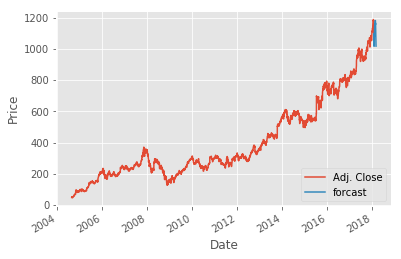

In [12]:
df['Adj. Close'].plot()
df['forcast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()